## Problem Statement
Take any dataset (after reading their descriptions, make sure it has multiple variables) from https://www2.stetson.edu/~jrasp/data.htm. This website is created by Dr. John Rasp as a vast collection of datasets for students to try out their statistics methods. 
* a) Find the Covariance matrix and Correlation matrix of this data matrix
* b) Perform PCA/SVD, choose appropriate number(justify by a scree plot) of dimensions/principal components/singular values and find the new data matrix in terms of these dimensions.
* c) Plot the scatter plot of this data along the first two dimensions (or three if it is possible)

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
### Dataset 
This dataset contains 8 features and 97 rows

In [4]:
poverty_dataset=pd.read_excel(r'Poverty.xls')

In [11]:
print(poverty_dataset.columns)

Index(['BirthRt', 'DeathRt', 'InfMort', 'LExpM', 'LExpF', 'GNP', 'Region',
       'Country'],
      dtype='object')


In [17]:
print(len(poverty_dataset))
print(poverty_dataset.shape)
print(poverty_dataset.head())

97
(97, 8)
   BirthRt  DeathRt  InfMort  LExpM  LExpF   GNP  Region            Country
0     24.7      5.7     30.8   69.6   75.5   600       1            Albania
1     12.5     11.9     14.4   68.3   74.7  2250       1           Bulgaria
2     13.4     11.7     11.3   71.8   77.7  2980       1     Czechoslovakia
3     12.0     12.4      7.6   69.8   75.9     *       1  Former_E._Germany
4     11.6     13.4     14.8   65.4   73.8  2780       1            Hungary


As we have seen in the dataset that in GNP feature there are some missing values so lets drop that feature

In [29]:
complete_data=poverty_dataset
poverty_dataset=poverty_dataset.drop(['GNP','Country'],axis=1)

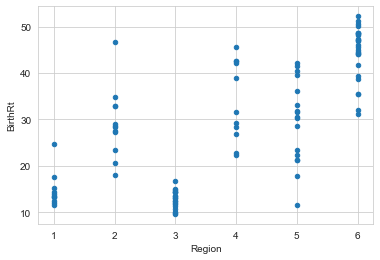

In [30]:
poverty_dataset.plot(kind='scatter',x='Region',y='BirthRt')
plt.show()

### Univeriate Aanalysis

The dataset that we are dealing with is a multivariate dataset but before diving in the multivariate analysis lets visualize each of the feature set and lets see their relationship with the other features and finds their individual statistics based on univariate analysis. 

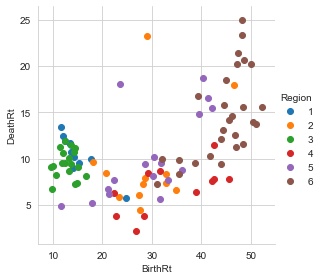

In [31]:
#The birth rate and Death rate relationship based on region
sns.set_style('whitegrid')
sns.FacetGrid(poverty_dataset,hue='Region',size=4).map(plt.scatter,'BirthRt','DeathRt').add_legend()
plt.show()

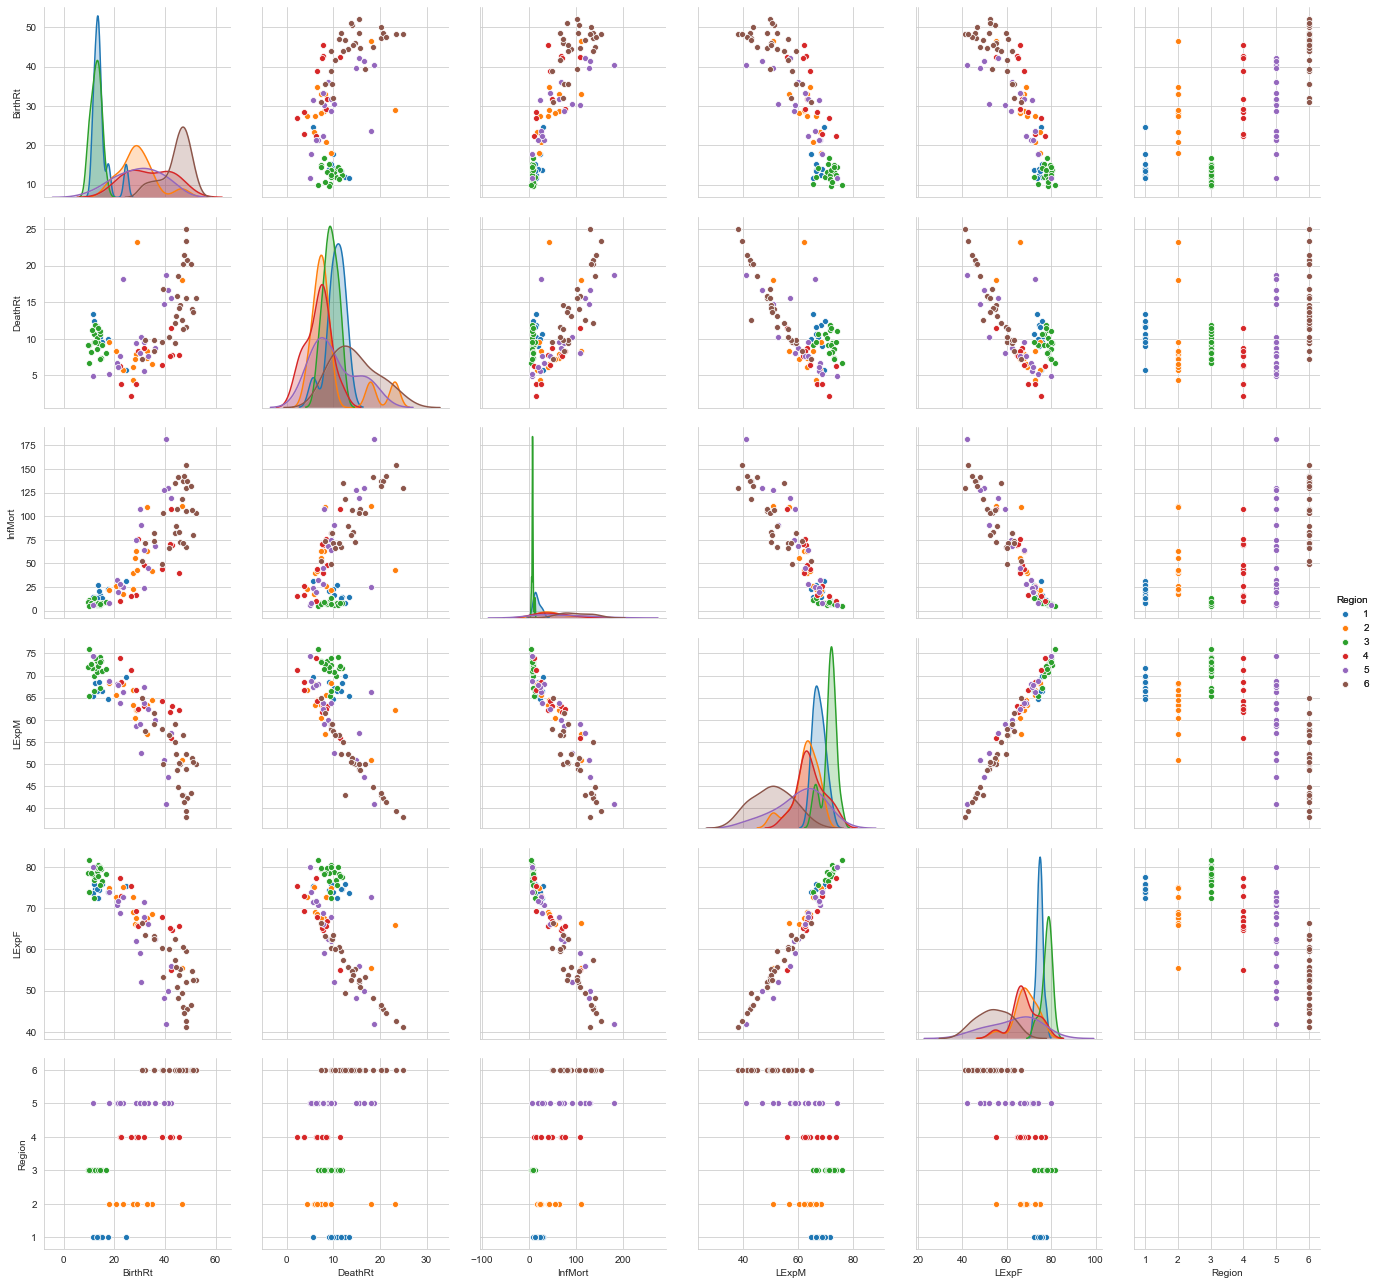

In [33]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(poverty_dataset,hue='Region',size=3).add_legend()
plt.show()

In [34]:
poverty_dataset.describe()

,BirthRt,DeathRt,InfMort,LExpM,LExpF,Region
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,29.229897,10.836082,54.901031,61.485567,66.151134,3.948454
std,13.546695,4.647495,45.992584,9.615970,11.005391,1.740277
min,9.700000,2.200000,4.500000,38.100000,41.200000,1.000000
25%,14.500000,7.800000,13.100000,55.800000,57.500000,3.000000
50%,29.000000,9.500000,43.000000,63.700000,67.800000,4.000000
75%,42.200000,12.500000,83.000000,68.600000,75.400000,6.000000
max,52.200000,25.000000,181.600000,75.900000,81.800000,6.000000


So from the above plot it is clear that the feature Region is the best attribute that classifies the dataset very perfectly. So lets make this as the target class.


In [41]:
X_s=poverty_dataset.iloc[:,0:5]
Y_s=poverty_dataset.iloc[:,5]

In [48]:
#lets visualize the distribution of each feature
columns=X_s.columns

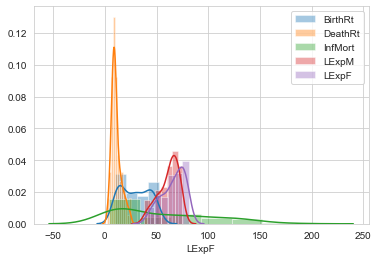

In [60]:
for attr in columns:
    sns.distplot(X_s[attr],label=attr)
    
plt.legend()
plt.show()

### Multivariate analysis

CoVariance matrix
For convariance matrix we need to remove that feature names and convert it into numpy array matrix



In [68]:
x_vec=X_s.values
y_vec=Y_s.values

In [87]:
print(type(x_vec))
n=len(x_vec)

<class 'numpy.ndarray'>


In [98]:

Cov_matrix=np.cov(x_vec.T)

In [100]:
print(Cov_matrix)

[[ 183.51295103   30.61005584  534.79496886 -112.8767515  -133.34521134]
 [  30.61005584   21.59920533  139.92589991  -32.77874463  -35.44690593]
 [ 534.79496886  139.92589991 2115.31781143 -414.3292558  -483.56686576]
 [-112.8767515   -32.77874463 -414.3292558    92.46687285  103.98164154]
 [-133.34521134  -35.44690593 -483.56686576  103.98164154  121.11862474]]


Where diagonal elements are the univariate variance of each indivdual feature. lets standardize the values

In [74]:
from sklearn.preprocessing import StandardScaler

In [102]:
x_stand = StandardScaler().fit_transform(x_vec)
corr_coef_matrix=np.corrcoef(x_stand.T)

In [103]:
corr_coef_matrix

array([[ 1.        ,  0.48619655,  0.85835342, -0.86651894, -0.89441402],
       [ 0.48619655,  1.        ,  0.65462322, -0.73346661, -0.69303311],
       [ 0.85835342,  0.65462322,  1.        , -0.93683844, -0.95535165],
       [-0.86651894, -0.73346661, -0.93683844,  1.        ,  0.98255782],
       [-0.89441402, -0.69303311, -0.95535165,  0.98255782,  1.        ]])

In [104]:
eig_val,eig_vect=np.linalg.eig(Cov_matrix)

In [107]:
print(eig_val)

[2.45774386e+03 4.85815823e+01 2.04331909e+01 5.80030034e+00
 1.45653300e+00]


In [106]:
print(eig_vect)

[[-0.24042561  0.91028739 -0.19145713 -0.27458627  0.03897364]
 [-0.06183699 -0.10441637  0.6402311  -0.75224857 -0.09746605]
 [-0.92652108 -0.30746902 -0.20684104 -0.06035962  0.02439252]
 [ 0.18406471 -0.15568305 -0.56288281 -0.38297027 -0.69164998]
 [ 0.21459401 -0.20420499 -0.44025906 -0.45652487  0.71414756]]


In [116]:
total = sum(eig_val)
var_exp = [(i / total)*100 for i in sorted(eig_val, reverse = True)]
#cum_var_exp = np.cumsum(var_exp)

<class 'list'>


In [253]:
print(sorted_eig_val)

[2457.7438588381196, 48.58158231937754, 20.43319087869282, 5.800300340155375, 1.456533001662933]


In [112]:
#ploting the variance as information

In [120]:
var_list=[]
for i in sorted_eig_val:
    percentage=i/sum(eig_val)
    var_list.append(percentage)

In [251]:
print(var_list)
cum_sum =np.cumsum(var_list)

[0.9699008914578541, 0.01917177814545439, 0.00806356202551618, 0.002288975903819167, 0.0005747924673560177]


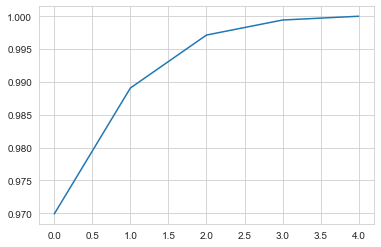

In [252]:
plt.plot(range(5),cum_sum)

## Principal Component Analysis

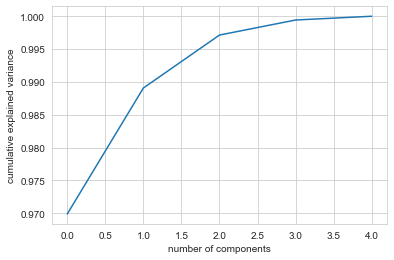

In [246]:
from sklearn.decomposition import PCA
pca=PCA().fit(x_vec)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here as we can see that first sigma values preserves more then 99% of the information

In [179]:
pca = PCA(n_components=1)
newdata = pca.fit_transform(x_vec)

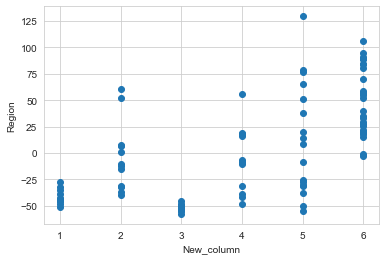

In [180]:
plt.scatter(y_vec,newdata)
plt.xlabel('New_column')
plt.ylabel('Region')
plt.show()

In [183]:
#taking top two components
pca2=PCA(2)
new_dataset=pca2.fit_transform(x_vec)
new_dataframe=pd.DataFrame(data=new_dataset,columns=['feat1','feat2'])

In [213]:
((new_dataframe).head())

,feat1,feat2
0,-27.236608,-0.650739
1,-44.570397,5.693905
2,-48.526605,5.058115
3,-51.493645,4.589038
4,-43.596494,6.157510


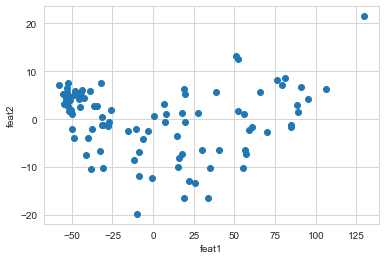

In [187]:
plt.scatter(new_dataframe['feat1'],new_dataframe['feat2'])
plt.xlabel('feat1')
plt.ylabel('feat2')
plt.show()

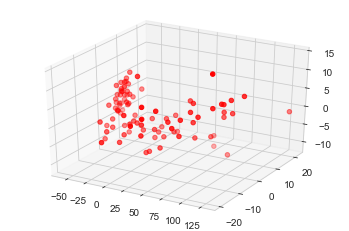

In [257]:
pca3=PCA(3)
new_dataset3=pca3.fit_transform(x_vec)
new_dataframe3=pd.DataFrame(data=new_dataset3,columns=['feat1','feat2','feat3'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')
ax.scatter(new_dataframe3['feat1'],new_dataframe3['feat2'],new_dataframe3['feat3'],color='red')
plt.show()

## Singular Matrix Decomposition

In [204]:
from sklearn.decomposition import TruncatedSVD as SVD

#### For U,sigma,V values from SVD

In [222]:
U, s, V = np.linalg.svd(x_vec)
print(U.shape)
print(s.shape)
print(V.shape)

(97, 97)
(5,)
(5, 5)


In [229]:
cum_sum=np.cumsum(s)

#### For Reducing the original 5 Dimention to 2 Dimentions

In [208]:
svd=SVD(2)
x_reduced=svd.fit_transform(x_vec)

In [212]:
# Reducing 5 dimentional original vector into 2-dimentional vector
x_red_dataframe=pd.DataFrame(data=x_reduced,columns=['feat1','feat2'])
(x_red_dataframe.head())

,feat1,feat2
0,104.519526,-34.581237
1,91.568739,-48.129960
2,93.659122,-53.193095
3,89.207849,-54.638704
4,89.635040,-46.327881


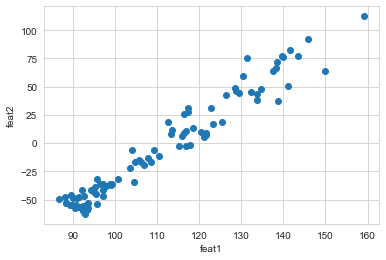

In [216]:
plt.scatter(x_red_dataframe['feat1'],x_red_dataframe['feat2'])
plt.xlabel('feat1')
plt.ylabel('feat2')
plt.show()

#### For reducing original 5 Dimentions to 3-Dimentions

In [240]:
from mpl_toolkits.mplot3d import Axes3D
svd=SVD(3)
x_reduced3=svd.fit_transform(x_vec)
x_red_df3=pd.DataFrame(data=x_reduced3,columns=['feat1','feat2','feat3'])

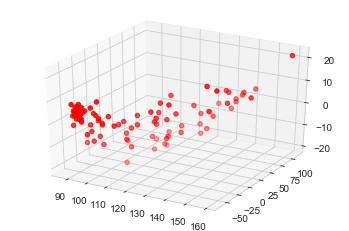

In [241]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')
ax.scatter(x_red_df3['feat1'],x_red_df3['feat2'],x_red_df3['feat3'],color='red')
